# Implements scheme from Boyd to assess the quality of the computed spectrum

In [1]:
import sys
import os
sys.path.append("../core-scripts")
from zeroShearSpectrum3D import spectrum, plot_modes
import numpy as np
import matplotlib.pyplot as plt
from cheb import cheb
from scipy.linalg import eig
chebfit = np.polynomial.chebyshev.Chebyshev.fit

In [2]:
k,a = 1.25, 1.09
evals_low, evecs_low = spectrum(k,a,M=50)
evals_high, evecs_high = spectrum(k,a,M=100)
re_evals_low = np.real(evals_low)
re_evals_high = np.real(evals_high)
sort_idx_low = np.argsort(-re_evals_low)
re_evals_low = re_evals_low[sort_idx_low]
sort_idx_high = np.argsort(-re_evals_high)
re_evals_high = re_evals_high[sort_idx_high];

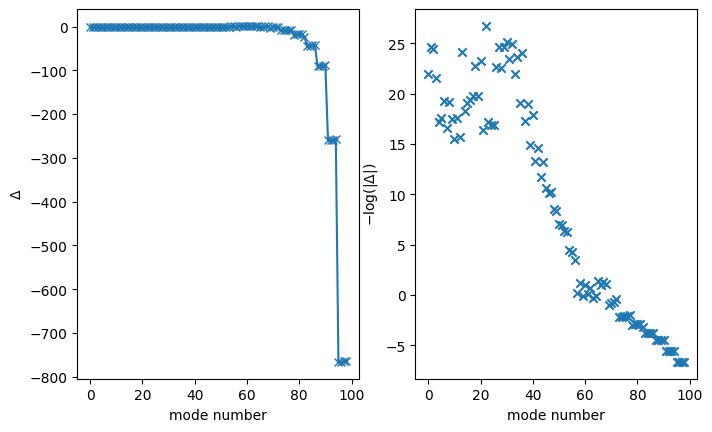

In [8]:
n = min(len(re_evals_low), len(re_evals_high))
diffs = re_evals_low[0:n] - re_evals_high[0:n]
# The "mode number" here only refers to how the modes are numbered
# in ascending order
fig, axs = plt.subplots(1,2)
axs[0].plot(np.arange(n), diffs, marker='x')
axs[0].set_ylabel("$\Delta$")
axs[0].set_xlabel("mode number")

axs[1].scatter(np.arange(n), np.log(1/np.abs(diffs)), marker='x');
axs[1].set_ylabel("$-\log(|\Delta|)$")
axs[1].set_xlabel("mode number")

fig.set_figwidth(8)

In [4]:
sort_idx_low

array([72, 73, 74, 75, 79, 86, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88,
       87, 85, 84, 82, 83, 80, 81, 78, 77, 76, 71, 70, 69, 68, 66, 67, 64,
       65, 62, 63, 60, 61, 58, 59, 56, 57, 54, 55, 53, 52, 51, 50, 49, 48,
       47, 46, 45, 44, 43,  2, 42, 41, 40, 39, 38, 36, 37, 35, 33, 32, 34,
       31, 28, 27, 29, 30, 23, 24, 26, 25, 19, 20, 22, 21,  1, 15, 16, 18,
       17, 11, 12, 14, 13,  7,  9,  8, 10,  3,  4,  6,  5,  0])

<Figure size 640x480 with 0 Axes>

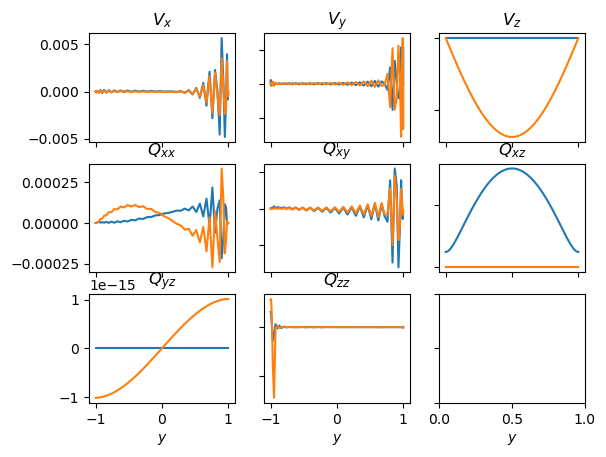

In [5]:
idx = sort_idx_low[0]
M=50
_, ygl_low = cheb(M)
plot_modes(idx,ygl_low,evecs_low,M)

(-1.151037001649397+0j)


<Figure size 640x480 with 0 Axes>

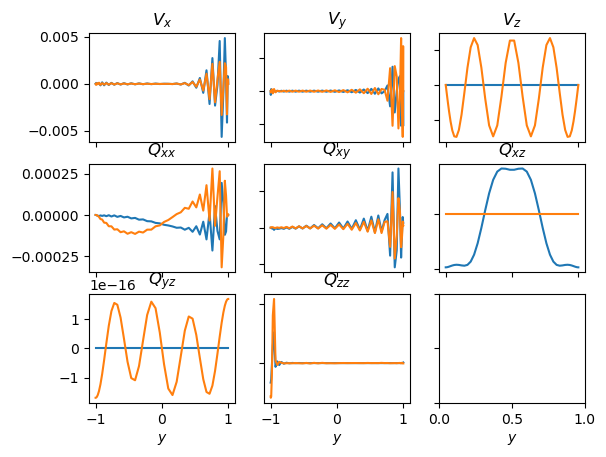

In [7]:
idx = sort_idx_low[10]
print(evals_low[idx])
_, ygl = cheb(50)
plot_modes(idx, ygl, evecs_low, M=50)

## Figure out analytic for $Q_{zz}$ later

In [8]:
# Analytical solution to the Qzz equation
n = np.array(range(50),dtype='d')
sigmas = -0.01*(np.pi**2)*n*n/4 - 1 - 0.01*(k**2)

In [18]:
print(np.round(sigmas,5))
print(list(np.round(re_evals_low,5)))

[ -1.01562  -1.0403   -1.11432  -1.23769  -1.41041  -1.63248  -1.90389
  -2.22465  -2.59476  -3.01422  -3.48303  -4.00118  -4.56868  -5.18553
  -5.85173  -6.56728  -7.33217  -8.14641  -9.01     -9.92294 -10.88523
 -11.89686 -12.95785 -14.06818 -15.22786 -16.43688 -17.69526 -19.00298
 -20.36005 -21.76647 -23.22223 -24.72735 -26.28181 -27.88562 -29.53878
 -31.24129 -32.99314 -34.79435 -36.6449  -38.5448  -40.49404 -42.49264
 -44.54058 -46.63787 -48.78451 -50.9805  -53.22583 -55.52052 -57.86455
 -60.25793]
[0.05158, -0.02159, -0.14458, -0.31685, -0.53817, -0.80747, -1.01562, -1.024, -1.05224, -1.09779, -1.15104, -1.23796, -1.41205, -1.50104, -1.63721, -1.88709, -1.9409, -2.22149, -2.39588, -2.59346, -2.91205, -3.01376, -3.47871, -3.48305, -4.00159, -4.09504, -4.56939, -4.76084, -5.18654, -5.47603, -5.85303, -6.24056, -6.56891, -7.05438, -7.33421, -7.91743, -8.14899, -8.82958, -9.01335, -9.79057, -9.92759, -10.79959, -10.89248, -11.85344, -11.91123, -12.941, -12.99493, -14.06011, -14.14606

(0.051583169829662996-0j)


<Figure size 640x480 with 0 Axes>

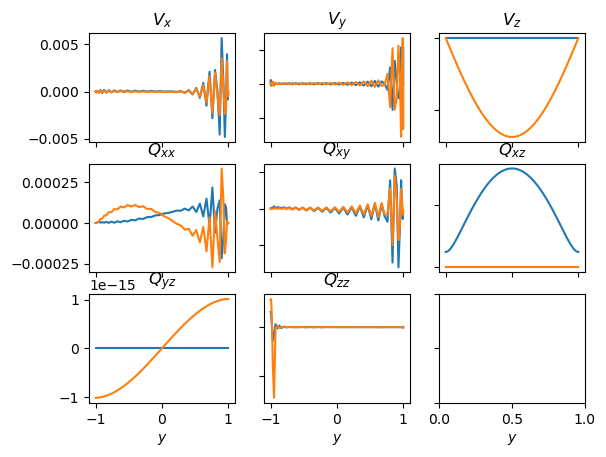

In [25]:
idx=sort_idx_low[0]
print(evals_low[idx])
plot_modes(idx,ygl,evecs_low,M=50)

# Scan over activity values

In [4]:
al,ar,an = 0.01, 5, 30
kl,kr,kn = 0.01, 20, 30
acts = np.linspace(al,ar,an)
ks = np.linspace(kl,kr,kn)
for i in range(len(acts)):
    print("Computing for {}/{} activity value".format(i+1,len(acts)))
    if not os.path.exists("data/manual-a-scan-1/M_50/a_{}/".format(i)):
        os.mkdir("data/manual-a-scan-1/M_50/a_{}/".format(i))
        
    if not os.path.exists("data/manual-a-scan-1/M_100/a_{}/".format(i)):
        os.mkdir("data/manual-a-scan-1/M_100/a_{}/".format(i))
        
    for j in range(len(ks)):
        evals_low,_ = spectrum(ks[j],acts[i],M=50)
        evals_high,_ = spectrum(ks[j],acts[i],M=100)
        np.savetxt("data/manual-a-scan-1/M_50/a_{}/k_{}".format(i,j),evals_low,delimiter=',')
        np.savetxt("data/manual-a-scan-1/M_100/a_{}/k_{}".format(i,j),evals_high,delimiter=',')

Computing for 1/30 activity value
Computing for 2/30 activity value
Computing for 3/30 activity value
Computing for 4/30 activity value
Computing for 5/30 activity value
Computing for 6/30 activity value
Computing for 7/30 activity value
Computing for 8/30 activity value
Computing for 9/30 activity value
Computing for 10/30 activity value
Computing for 11/30 activity value
Computing for 12/30 activity value
Computing for 13/30 activity value
Computing for 14/30 activity value
Computing for 15/30 activity value
Computing for 16/30 activity value
Computing for 17/30 activity value
Computing for 18/30 activity value
Computing for 19/30 activity value
Computing for 20/30 activity value
Computing for 21/30 activity value
Computing for 22/30 activity value
Computing for 23/30 activity value
Computing for 24/30 activity value
Computing for 25/30 activity value
Computing for 26/30 activity value
Computing for 27/30 activity value
Computing for 28/30 activity value
Computing for 29/30 activity 